In [63]:
import pickle
from sentence_transformers import SentenceTransformer, util
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas
import math

In [59]:
df = pandas.read_excel("./companies_data.xlsx")
pdf = pandas.read_csv("./data.csv")
pdf.dropna(subset=["abstract", "title", "subject_areas"], inplace=True)

In [56]:
company_encode = []

model = SentenceTransformer('all-mpnet-base-v2')

for company in df["business_summary"].tolist():
    e1 = model.encode(company, convert_to_tensor=True)
    company_encode.append(e1)
    
df["vector"] = company_encode

df.to_pickle("./company_vector.pkl")



In [64]:
with open("./model.pkl", "wb") as f:
    pickle.dump(model, f)

In [65]:
data_encode = []

with open("./model.pkl", 'rb') as file:
        model = pickle.load(file)

for abstract in pdf["abstract"].tolist():
    e1 = model.encode(abstract, convert_to_tensor=True)
    data_encode.append(e1)
    
pdf["vector"] = data_encode

pdf

,eid,title,abstract,doi,publication_name,cover_date,citedby_count,author_ids,subject_areas,affiliations,vector
0,2-s2.0-85066074915,Health and disease concepts: an approach to he...,Purpose: Health for all is an ideal goal that ...,10.1108/JHR-08-2018-045,Journal of Health Research,2018-11-07,1,['12041813500'],"['Health Policy', 'Public Health, Environmenta...",[],"[tensor(0.0313, device='cuda:0'), tensor(0.024..."
1,2-s2.0-85048018727,Examining the relationships between HR practic...,Purpose: The purpose of this paper is to exten...,10.1108/APJBA-11-2017-0114,Asia-Pacific Journal of Business Administration,2018-11-06,23,['12140303400'],"['Business, Management and Accounting (all)', ...",[],"[tensor(0.0224, device='cuda:0'), tensor(-0.06..."
2,2-s2.0-85061255485,Investigation of instructional design on readi...,This research aims to investigate the current ...,10.1145/3291078.3291100,ACM International Conference Proceeding Series,2018-11-05,3,"['57205711115', '56119381800', '6505939223']","['Software', 'Human-Computer Interaction', 'Co...","[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0282, device='cuda:0'), tensor(-0.09..."
3,2-s2.0-85054896135,Results of a real-world study on vortioxetine ...,Objective: The REVIDA study aimed to assess th...,10.1080/03007995.2018.1477746,Current Medical Research and Opinion,2018-11-02,12,"['57204192635', '7004330084', '56021778200', '...",['Medicine (all)'],"[{'afid': None, 'name': 'Makati Medical Center...","[tensor(0.0417, device='cuda:0'), tensor(0.001..."
4,2-s2.0-85056159676,Optical Properties of Individual Aragonite Pla...,The unique structural architecture of nacre fr...,10.1002/slct.201801566,ChemistrySelect,2018-11-08,4,"['55237949400', '50462130300', '26538365800', ...",['Chemistry (all)'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0777, device='cuda:0'), tensor(0.032..."
...,...,...,...,...,...,...,...,...,...,...,...
20210,2-s2.0-85121585004,Comparison of the effect of hot and thermo-neu...,Exercise training is recommended to promote en...,10.48048/tis.2021.394,Trends in Sciences,2021-11-01,0,"['57382685800', '6508138646', '57193800471']",['Multidisciplinary'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0103, device='cuda:0'), tensor(0.002..."
20211,2-s2.0-85120995424,Measurement of prompt open-charm production cr...,The production cross sections for prompt open-...,10.1007/JHEP11(2021)225,Journal of High Energy Physics,2021-11-01,2,"['35222495600', '56217303000', '57195404626', ...",['Nuclear and High Energy Physics'],"[{'afid': None, 'name': 'Rheinisch-Westfälisch...","[tensor(-0.0216, device='cuda:0'), tensor(-0.0..."
20212,2-s2.0-85120069769,Complete genome sequences of mycobacterium far...,Mycobacterium farcinogenes is a nonchromogenic...,10.1128/MRA.01005-21,Microbiology Resource Announcements,2021-11-01,0,"['24481984300', '35208717600', '12783320200', ...","['Molecular Biology', 'Immunology and Microbio...","[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(0.0576, device='cuda:0'), tensor(0.049..."
20213,2-s2.0-85120059914,Adaptability of siamese rosewood and teak seed...,"Rosewood and Teak are valuable timber species,...",10.32526/ennrj/19/202100003,Environment and Natural Resources Journal,2021-11-01,2,"['54897960400', '57220119760', '25721817900']",['Environmental Science (all)'],"[{'afid': None, 'name': 'Chulalongkorn Univers...","[tensor(-0.0193, device='cuda:0'), tensor(-0.0..."


In [66]:
pdf.to_pickle("./data_vector.pkl")

In [ ]:

df

In [24]:
# Load a Sentence-BERT model (optimized for similarity)
model = SentenceTransformer('all-mpnet-base-v2')

# Two example paragraphs
'''
p1n = ["mckinsey", "tsmc", "rivian", "meta", "phillips"]
p1s =["To help our clients make distinctive, lasting, and substantial improvements in their performance and to build a great firm that attracts, develops, excites, and retains exceptional people.", "Our vision is to be the most advanced and largest technology and foundry services provider to fabless companies and IDMs, and in partnership with them, to forge a powerful competitive force in the semiconductor industry.", "To create a sustainable future by leading the way in emissions-free transportation and inspiring people to explore the world responsibly (Rivian, 2024). Rivian is an innovator of electric vehicles that is filling an adventurous niche market by manufacturing stylish off-roading SUVs and pickup truck vehicles in a sustainable way that encourages its customers to be adventurous. This enables their customers with the confidence of knowing that their vehicle is reliable, and performance based to them on any adventure they are looking for", "Build the future of human connection and the technology that makes it possible, by building technology that connects you to people, interests and experiences that matter to you. Our principles embody what we stand for and guide our approach to how we build.", "our purpose is to improve people’s health and well-being through meaningful innovation. We aim to improve 2.5 billion lives per year by 2030, including 400 million in underserved communities."] 
'''

p1n = df["company_name"].tolist()[0:1]
p1s = df["business_summary"].tolist()[0:1]


p2s = pdf["abstract"].dropna().tolist()
p2n = pdf["title"].dropna().tolist()

i1 = 0
i2 = 0
s = []
for p1 in p1s:
    for p2 in p2s:
        e1 = model.encode(p1, convert_to_tensor=True)
        e2 = model.encode(p2, convert_to_tensor=True)
        similarity = util.cos_sim(e1, e2).item()
        print(f"Similarity score ({p1n[i1]}, {p2n[i2]}): {similarity:.4f}")
        s.append(similarity)
        i2 += 1
    i1 += 1
    i2 = 0
    
s.sort()
print(s[0])
print(s[-1])


Similarity score (Delta Electronics (Thailand) Public Company Limited, Health and disease concepts: an approach to health development): 0.0869
Similarity score (Delta Electronics (Thailand) Public Company Limited, Examining the relationships between HR practices, organizational job embeddedness, job satisfaction, and quit intention: Evidence from Thai accountants): 0.1449
Similarity score (Delta Electronics (Thailand) Public Company Limited, Investigation of instructional design on reading comprehension affect the demand for mobile application for students with learning disabilities): 0.1152
Similarity score (Delta Electronics (Thailand) Public Company Limited, Results of a real-world study on vortioxetine in patients with major depressive disorder in South East Asia (REVIDA)): 0.1536
Similarity score (Delta Electronics (Thailand) Public Company Limited, Optical Properties of Individual Aragonite Plates from Nacre): -0.0082
Similarity score (Delta Electronics (Thailand) Public Company 

In [52]:
nparray = np.array(s, dtype=float)

pt = PowerTransformer(method='yeo-johnson')
x_yj = pt.fit_transform(nparray.reshape(-1,1))

z = sts.zscore(x_yj)

# boolean mask for highs (right-tail outliers)
mask_high = (z > 3)

highs_trans = x_yj[mask_high]              # shape: (k,)
highs_trans_2d = highs_trans.reshape(-1, 1)  # shape: (k, 1)

highs_original = pt.inverse_transform(highs_trans_2d)
highs_original = highs_original.flatten()   # back to 1D for convenience

print(highs_original)

[0.37709948 0.377242   0.38031399 0.38191193 0.38192874 0.38302708
 0.38475999 0.38489419 0.38549411 0.38643643 0.39054847 0.39329854
 0.39883119 0.40215272 0.4049111  0.40802032 0.41093478 0.42569047
 0.42803621 0.43273202 0.44012326 0.44221333 0.44338039 0.44929489
 0.45183128 0.45352989 0.46198866]


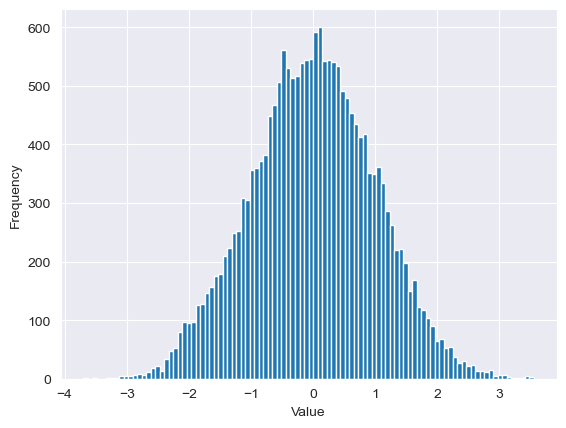

In [48]:

plt.hist(x_yj, bins=100)  # bins = number of bars
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [53]:
len(s)

19551